In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, parser='auto')
X, y = mnist["data"].to_numpy(), mnist["target"].to_numpy()

In [3]:

# Convert y to integer values
y = y.astype(int)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Add bias term to the features
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

# Initialize weights
num_classes = 10
num_features = X_train.shape[1]

In [4]:
# Softmax function
def softmax(z):
    z -= np.max(z,axis=1,keepdims=True)
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Cross-entropy loss function
def cross_entropy_loss(y_true, y_pred):
    return -np.mean(np.log(y_pred[np.arange(len(y_true)), y_true]))

In [5]:
# Stochastic Gradient Descent
def SGD(weights, learning_rate, batch_size, num_iter=1000):
    
    # save train accuracy
    acc_trace = np.zeros((int(num_iter/20),))
    
    for i in range(num_iter):
        
        batch_indices = np.arange(X_train.shape[0])
        np.random.shuffle(batch_indices)
        batch_index = batch_indices[:batch_size]
        
        X_batch = X_train[batch_index]
        y_batch = y_train[batch_index]

        # Forward pass
        z = np.dot(X_batch, weights.T)
        y_pred = softmax(z)

        # Backward pass
        gradient = np.dot(X_batch.T, (y_pred - np.eye(num_classes)[y_batch])) / len(y_batch)
        weights -= learning_rate * gradient.T

        if (i+1) % 20 == 0:
            
        
            # Compute loss and accuracy on the training set
            z_train = np.dot(X_train, weights.T)
            y_pred_train = np.argmax(softmax(z_train), axis=1)
            loss_train = cross_entropy_loss(y_train, softmax(z_train))
            acc_trace[((i+1) // 20)-1] = accuracy_score(y_train, y_pred_train)

    

    # Evaluate on the test set
    z_test = np.dot(X_test, weights.T)
    y_pred_test = np.argmax(softmax(z_test), axis=1)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    print(f"Test Accuracy: {accuracy_test:.4f}")
    
    return acc_trace

In [6]:
acc_trace1 = SGD(np.zeros((num_classes, num_features)), learning_rate=1e-3, batch_size=1, num_iter=1000)
acc_trace2 = SGD(np.zeros((num_classes, num_features)), learning_rate=1e-4, batch_size=1, num_iter=1000)
acc_trace3 = SGD(np.zeros((num_classes, num_features)), learning_rate=1e-3, batch_size=4, num_iter=1000)
acc_trace4 = SGD(np.zeros((num_classes, num_features)), learning_rate=1e-3, batch_size=32, num_iter=1000)

Test Accuracy: 0.8293
Test Accuracy: 0.7439
Test Accuracy: 0.8496
Test Accuracy: 0.8497


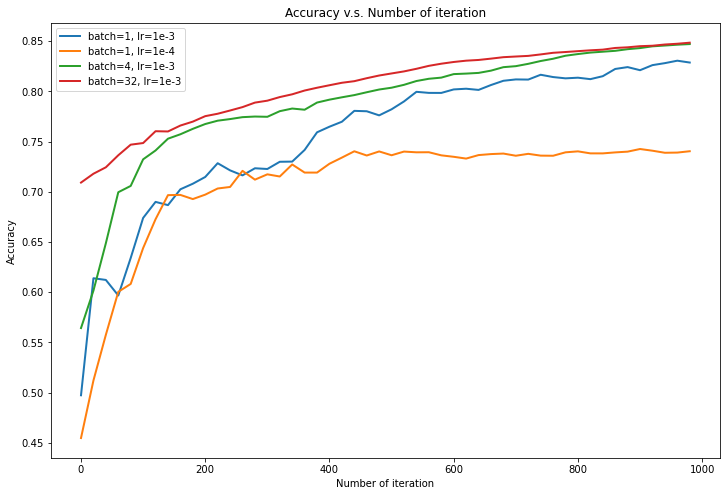

In [7]:
fig, ax = plt.subplots(figsize=(12,8))

# Plot the data using semilogy
ax.plot(20*np.arange(len(acc_trace1)), acc_trace1, linewidth=2, label='batch=1, lr=1e-3')
ax.plot(20*np.arange(len(acc_trace2)), acc_trace2, linewidth=2, label='batch=1, lr=1e-4')
ax.plot(20*np.arange(len(acc_trace3)), acc_trace3, linewidth=2, label='batch=4, lr=1e-3')
ax.plot(20*np.arange(len(acc_trace4)), acc_trace4, linewidth=2, label='batch=32, lr=1e-3')
# Set labels and title
ax.set_xlabel('Number of iteration')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy v.s. Number of iteration')

# Add a legend
ax.legend()

# Display the plot
plt.show()

In [8]:
# Stochastic Gradient Descent with momentum
def SGD_withmom(weights, learning_rate, momentum, batch_size, num_iter=1000):
    
    # save train accuracy
    acc_trace = np.zeros((int(num_iter/20),))
    
    mom_g = np.zeros_like(weights)
    for i in range(num_iter):
        
        batch_indices = np.arange(X_train.shape[0])
        np.random.shuffle(batch_indices)
        batch_index = batch_indices[:batch_size]
        
        X_batch = X_train[batch_index]
        y_batch = y_train[batch_index]

        # Forward pass
        z = np.dot(X_batch, weights.T)
        y_pred = softmax(z)

        # Backward pass
        gradient = np.dot(X_batch.T, (y_pred - np.eye(num_classes)[y_batch])) / len(y_batch)
        
        mom_g = momentum * mom_g + gradient.T
        
        weights -= learning_rate * mom_g

        if (i+1) % 20 == 0:
        
            # Compute loss and accuracy on the training set
            z_train = np.dot(X_train, weights.T)
            y_pred_train = np.argmax(softmax(z_train), axis=1)
            loss_train = cross_entropy_loss(y_train, softmax(z_train))
            acc_trace[((i+1) // 20)-1] = accuracy_score(y_train, y_pred_train)

    

    # Evaluate on the test set
    z_test = np.dot(X_test, weights.T)
    y_pred_test = np.argmax(softmax(z_test), axis=1)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    print(f"Test Accuracy: {accuracy_test:.4f}")
    
    return acc_trace

In [9]:
acc_trace5 = SGD_withmom(np.zeros((num_classes, num_features)), learning_rate=1e-3, momentum=0.3,batch_size=1, num_iter=1000)

Test Accuracy: 0.8516


In [10]:
acc_trace6 = SGD_withmom(np.zeros((num_classes, num_features)), learning_rate=1e-3, momentum=0.6,batch_size=1, num_iter=1000)

Test Accuracy: 0.8489


In [11]:
acc_trace7 = SGD_withmom(np.zeros((num_classes, num_features)), learning_rate=1e-3, momentum=0.9,batch_size=1, num_iter=1000)

Test Accuracy: 0.8328


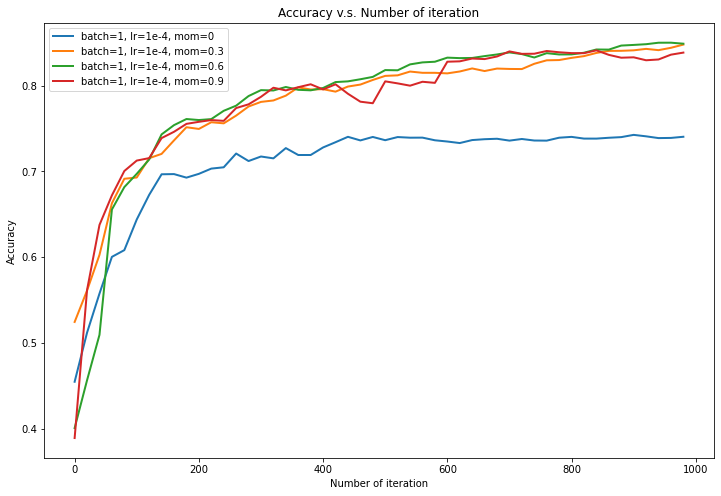

In [12]:
fig, ax = plt.subplots(figsize=(12,8))

# Plot the data using semilogy
ax.plot(20*np.arange(len(acc_trace3)), acc_trace2, linewidth=2, label='batch=1, lr=1e-4, mom=0')
ax.plot(20*np.arange(len(acc_trace5)), acc_trace5, linewidth=2, label='batch=1, lr=1e-4, mom=0.3')
ax.plot(20*np.arange(len(acc_trace6)), acc_trace6, linewidth=2, label='batch=1, lr=1e-4, mom=0.6')
ax.plot(20*np.arange(len(acc_trace7)), acc_trace7, linewidth=2, label='batch=1, lr=1e-4, mom=0.9')
# Set labels and title
ax.set_xlabel('Number of iteration')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy v.s. Number of iteration')

# Add a legend
ax.legend()

# Display the plot
plt.show()